In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import  AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from dataset.dataset import get_twenty_dataset, get_IMDB_dataset
from main_dataset import main

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
from datetime import datetime
import time
plt.style.use('seaborn')
%matplotlib inline

In [83]:
scores_tuned = joblib.load('dump_model_joblib/scores_tuned.joblib')
scores_nottuned = joblib.load('dump_model_joblib/scores_nottuned.joblib')

runtime_tuned = joblib.load('dump_model_joblib/runtimes_best_models_tuned.joblib')
runtime_nottuned = joblib.load('dump_model_joblib/runtimes_best_models_nottuned.joblib')

grid_dict_20_tuned = joblib.load('dump_model_joblib/grid_dict_20_tuned.joblib')
grid_dict_20_nottuned = joblib.load('dump_model_joblib/grid_dict_20_nottuned.joblib')

grid_dict_imdb_tuned = joblib.load('dump_model_joblib/grid_dict_imdb_tuned.joblib')
grid_dict_imdb_nottuned = joblib.load('dump_model_joblib/grid_dict_imdb_nottuned.joblib')
                                    
dataset_list = ['tf-idf','tf-idf & remove stopping word','SVD-2','SVD-3','SVD-4','SVD-5','SVD-6']
model_name_list = ['NB','LR','DT','SVC','ADB','RDF','NN','XG']

Concatenate the result into one

In [90]:
rumtime_tuned = np.zeros_like(scores_tuned)

(2, 6, 7)

In [95]:
# 20 news
a = [ [0.0744,0.0601,0,0,0,0,0],[26.9467,26.7274,0.4292,0.6357,0.7613,0.7709,0.6676], 
[12.6552,10.2424,0.0834,0.1978,0.0587,0.0691,0.3867],[1.1641,2.7267,0.2104,0.2109,0.2110,0.2307,0.2380],
[15.8085,16.2215,0.2700,1.1526,0.3237,0.3521,0.6464],
[13.8336,10.0476,1.8279,1.7927,1.9575,2.9379,2.9147]]

b = [  
 [0.0744,],
]

In [96]:
np.shape(a)

(6, 7)

In [94]:
grid_dict_20_tuned['NB'].best_params_

{'NB__alpha': 0.0, 'NB__fit_prior': True}

In [86]:
runtime_tuned.keys()

dict_keys(['NB', 'LR', 'DT', 'SVC', 'ADB', 'RDF'])

In [78]:
scores = np.concatenate((scores_tuned,scores_nottuned),axis=1)
runtime = np.concatenate((runtime_tuned,runtime_nottuned),axis=1)
print(scores_tuned.shape,scores_nottuned.shape,'-->',scores.shape)
print(runtime_tuned.shape,runtime_nottuned.shape,'-->',runtime.shape)

ValueError: zero-dimensional arrays cannot be concatenated

In [69]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

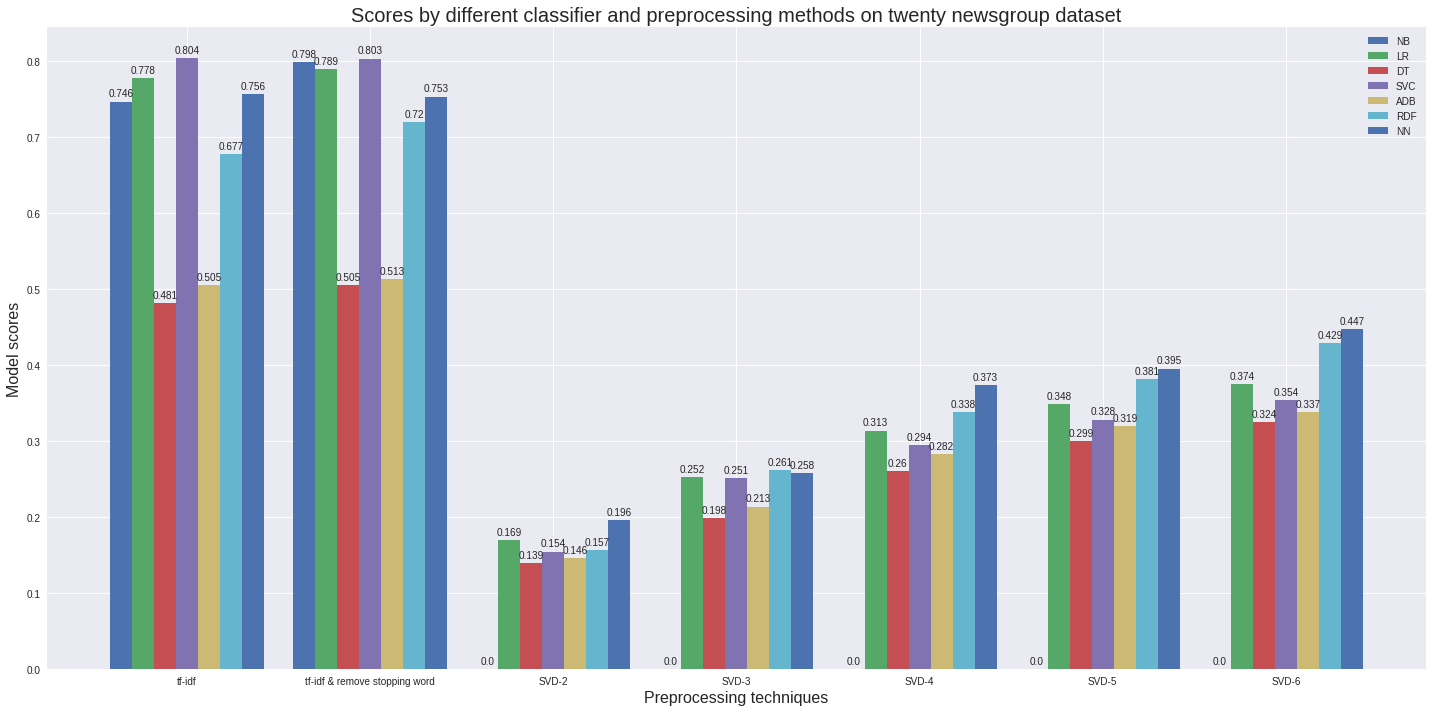

In [63]:
rects=[]
x = np.arange(len(dataset_list))  # the label locations
w = 0.12
width = [-w*3 + w*i for i in range(len(model_name_list))]  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
for i in range(len(model_name_list)):
    rect = ax.bar(list(x + width[i]), scores[0,i,:], w, label= model_name_list[i])
    rects.append(rect)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model scores',fontsize=16)
ax.set_xlabel('Preprocessing techniques',fontsize=16)
ax.set_title('Scores by different classifier and preprocessing methods on twenty newsgroup dataset',fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(dataset_list)
ax.legend()

for _,_rect in enumerate(rects):
    autolabel(_rect)

fig.tight_layout()
plt.savefig('fig/model_acc_20.pdf')
plt.show()

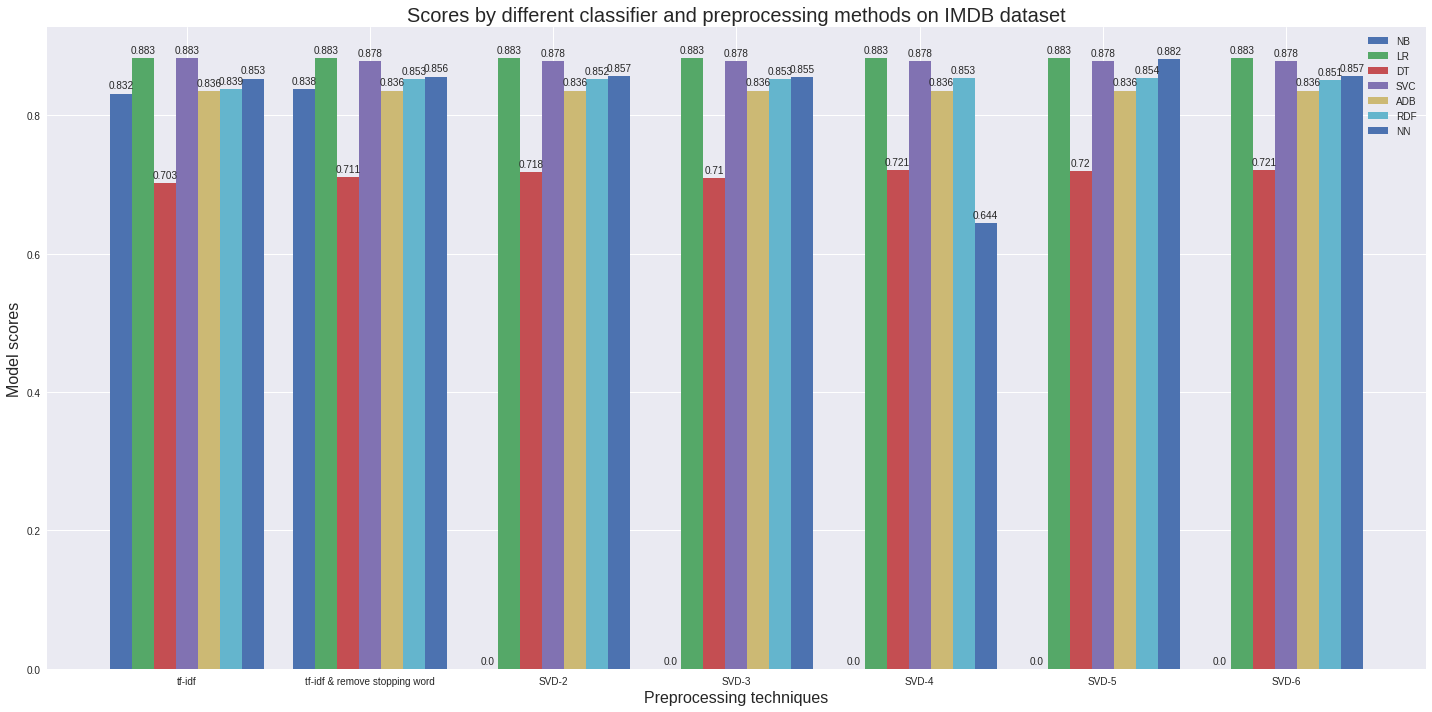

In [64]:
rects=[]
x = np.arange(len(dataset_list))  # the label locations
w = 0.12
width = [-w*3 + w*i for i in range(len(model_name_list))]  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
for i in range(len(model_name_list)):
    rect = ax.bar(list(x + width[i]), scores[1,i,:], w, label= model_name_list[i])
    rects.append(rect)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model scores',fontsize=16)
ax.set_xlabel('Preprocessing techniques',fontsize=16)
ax.set_title('Scores by different classifier and preprocessing methods on IMDB dataset',fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(dataset_list)
ax.legend()

for _,_rect in enumerate(rects):
    autolabel(_rect)

fig.tight_layout()
plt.savefig('fig/model_acc_imdb.pdf')
plt.show()